In [1]:
print("Lord_Balaji")

Lord_Balaji


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [6]:
df = pd.read_csv(r"E:\Python_Vedeo\DataSets\NLP\spam.csv",encoding='cp1252')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df = df.iloc[:,[0,1]]

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.label.value_counts()

ham     5854
spam     922
?v1        2
Name: label, dtype: int64

In [20]:
length = df.message.apply(len)

In [21]:
length

0       111
1        29
2       155
3        49
4        61
       ... 
6773    161
6774     37
6775     57
6776    125
6777     26
Name: message, Length: 6778, dtype: int64

In [23]:
df = pd.concat([df,length], axis=1)

In [24]:
df.head()

,label,message,message
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df.columns.values[2] = "length"

In [28]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
from nltk.corpus import stopwords

In [36]:
import string

In [37]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def data_prepration(mess):
    """
    1. This function will remove the stopwords
    2. This function will remove the punctuations.
    3. at the end, I will have cleaned data
    """
    remove_punctuation = [char for char in mess if char not in string.punctuation]
    remove_punctuation = "".join(remove_punctuation)
    return [word for word in remove_punctuation.split() if word not in stopwords.words("english")]

In [41]:
df['message'].apply(data_prepration)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
6773    [This, 2nd, time, tried, 2, contact, u, U, å£7...
6774             [Will, Ì, b, going, esplanade, fr, home]
6775                     [Pity, mood, Soany, suggestions]
6776    [The, guy, bitching, I, acted, like, id, inter...
6777                              [Rofl, Its, true, name]
Name: message, Length: 6778, dtype: object

In [42]:
df.message = df.message.str.lower()

In [43]:
df.head()

,label,message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [53]:
from wordcloud import WordCloud

In [54]:
cloud = WordCloud().generate(str(df['message']))

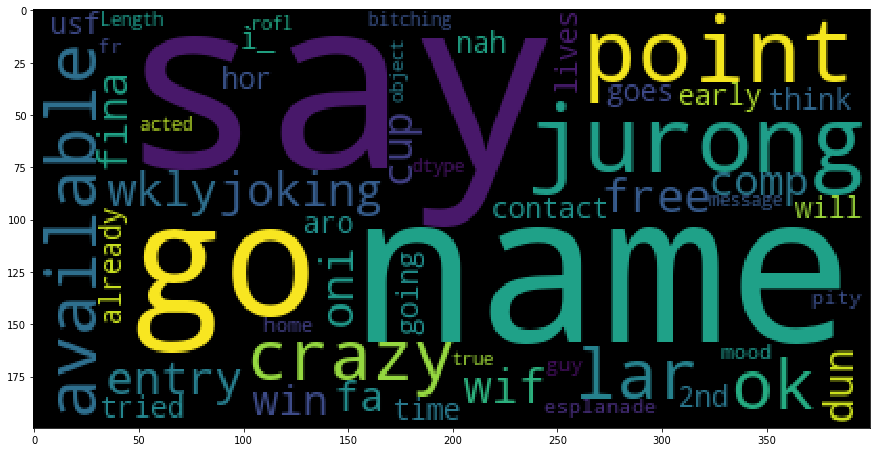

In [56]:
plt.figure(figsize=(15,15))
plt.imshow(cloud)

In [57]:
df_spam = df[df['label']=='spam']

In [58]:
df_spam.head()

,label,message,length
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
5,spam,freemsg hey there darling it's been 3 week's n...,148
8,spam,winner!! as a valued network customer you have...,158
9,spam,had your mobile 11 months or more? u r entitle...,154
11,spam,"six chances to win cash! from 100 to 20,000 po...",136


In [59]:
wc_spam= WordCloud()

In [62]:
wc_spam_image = wc_spam.generate(str(df_spam['message']))

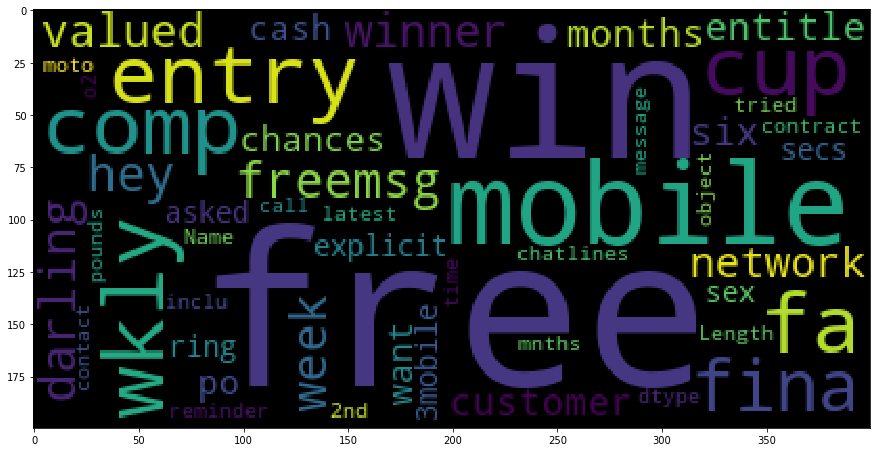

In [63]:
plt.figure(figsize = (15,15))
plt.imshow(wc_spam_image)

In [64]:
df_ham = df[df['label']=='ham']

In [65]:
df_ham.head()

,label,message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61
6,ham,even my brother is not like to speak with me. ...,77


In [67]:
wc_ham = WordCloud()

In [68]:
wc_ham_image = wc_ham.generate(str(df_ham['message']))

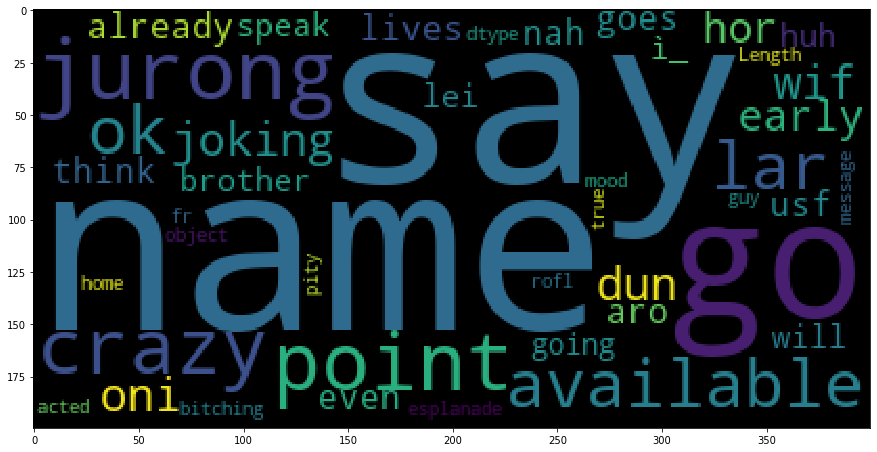

In [69]:
plt.figure(figsize = (15,15))
plt.imshow(wc_ham_image)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
bow = CountVectorizer(analyzer=data_prepration)

In [72]:
bow.fit(df['message'])

CountVectorizer(analyzer=<function data_prepration at 0x000002D4E472F438>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [73]:
bow.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9101,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8864,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8997,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9053,
 'comp': 2290,
 'win': 9011,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8917,
 'word': 9087,
 'back': 1424,
 'id': 4290,
 'like': 4

In [74]:
print(len(bow.vocabulary_))

9423


In [75]:
message_bow = bow.transform(df.message)

In [78]:
message_bow.shape

(6778, 9423)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test=train_test_split(message_bow, df.label, test_size = 0.25)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5083, 9423), (1695, 9423), (5083,), (1695,))

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [84]:
nb = MultinomialNB()

In [85]:
spam_model = nb.fit(X_train, y_train)

In [86]:
prediction = spam_model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score1=accuracy_score(y_test, prediction)

TypeError: 'numpy.float64' object is not callable

In [92]:
accuracy_score

0.9752212389380531

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
table = confusion_matrix(y_test, prediction)

In [97]:
table

array([[   0,    2,    0],
       [   0, 1433,   25],
       [   0,   15,  220]], dtype=int64)

In [100]:
ac = table.diagonal().sum()/table.sum()*100

In [101]:
ac

97.52212389380531